In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10, cifar100
import cv2

In [2]:
def preprocess_images(images):
    processed_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        equalized = cv2.equalizeHist(gray)            # Equalize histogram
        resized = cv2.resize(equalized, (32, 32))     # Resize to ensure uniformity
        normalized = resized.astype('float32') / 255.0  # Normalize pixel values
        blurred = cv2.GaussianBlur(normalized, (5, 5), 0)  # Apply Gaussian Blur
        processed_images.append(blurred.reshape(32, 32, 1))  # Reshape for consistency
    return np.array(processed_images)


In [3]:
def filter_and_combine_datasets(cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels):
    # Define unique mappings for each dataset to avoid overlap
    cifar10_classes = {'C10_automobile': 1, 'C10_bird': 2, 'C10_cat': 3, 'C10_deer': 4, 'C10_dog': 5, 'C10_horse': 7, 'C10_truck': 9}
    cifar100_classes = {'C100_cattle': 11, 'C100_fox': 34, 'C100_baby': 2, 'C100_boy': 11, 'C100_girl': 35, 'C100_man': 44, 'C100_woman': 98,
                        'C100_rabbit': 65, 'C100_squirrel': 78, 'C100_trees': 84, 'C100_bicycle': 8, 'C100_bus': 13,
                        'C100_motorcycle': 48, 'C100_pickup truck': 58, 'C100_train': 95, 'C100_lawn-mower': 48, 'C100_tractor': 86}

    # Filter datasets by redefined class mappings
    def filter_dataset(images, labels, class_mapping):
        filtered_images = []
        filtered_labels = []
        for img, lbl in zip(images, labels):
            class_id = lbl[0]
            for key, value in class_mapping.items():
                if class_id == value:
                    filtered_images.append(img)
                    filtered_labels.append(key)
        return filtered_images, filtered_labels

    cifar10_filtered_images, cifar10_filtered_labels = filter_dataset(cifar10_train_images, cifar10_train_labels, cifar10_classes)
    cifar100_filtered_images, cifar100_filtered_labels = filter_dataset(cifar100_train_images, cifar100_train_labels, cifar100_classes)
    # Combine filtered datasets
    combined_images = cifar10_filtered_images + cifar100_filtered_images
    combined_labels = cifar10_filtered_labels + cifar100_filtered_labels

    return combined_images, combined_labels


In [4]:
# Load CIFAR-10 dataset
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = cifar10.load_data()

# Load CIFAR-100 dataset
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = cifar100.load_data()

# Assuming cifar10_train_images, cifar10_test_images, cifar100_train_images, cifar100_test_images have been defined
print("Total number of CIFAR-10 training images:", len(cifar10_train_images))
print("Total number of CIFAR-10 testing images:", len(cifar10_test_images))
print("Total number of CIFAR-100 training images:", len(cifar100_train_images))
print("Total number of CIFAR-100 testing images:", len(cifar100_test_images))


Total number of CIFAR-10 training images: 50000
Total number of CIFAR-10 testing images: 10000
Total number of CIFAR-100 training images: 50000
Total number of CIFAR-100 testing images: 10000


In [5]:
# Ensure the datasets are loaded as per the earlier steps
combined_images, combined_labels = filter_and_combine_datasets(cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels)
combined_test_images, combined_test_labels = filter_and_combine_datasets(cifar10_test_images, cifar10_test_labels, cifar100_test_images, cifar100_test_labels)

# This assumes the combined_labels list contains labels for the combined dataset
from collections import Counter

label_counts = Counter(combined_labels)
print("Number of images per class:")
for label, count in label_counts.items():
    print(f"{label}: {count}")


Number of images per class:
C10_truck: 5000
C10_deer: 5000
C10_automobile: 5000
C10_bird: 5000
C10_horse: 5000
C10_cat: 5000
C10_dog: 5000
C100_cattle: 500
C100_boy: 500
C100_tractor: 500
C100_bicycle: 500
C100_trees: 500
C100_rabbit: 500
C100_squirrel: 500
C100_woman: 500
C100_girl: 500
C100_train: 500
C100_fox: 500
C100_motorcycle: 500
C100_lawn-mower: 500
C100_man: 500
C100_baby: 500
C100_bus: 500
C100_pickup truck: 500


In [6]:
# Calculate total images
total_images = sum(label_counts.values())

# Print relative numbers and discuss handling strategies
print("Relative numbers of each type of image:")
for label, count in label_counts.items():
    percentage = (count / total_images) * 100
    print(f"{label}: {percentage:.2f}% of the dataset")


Relative numbers of each type of image:
C10_truck: 11.49% of the dataset
C10_deer: 11.49% of the dataset
C10_automobile: 11.49% of the dataset
C10_bird: 11.49% of the dataset
C10_horse: 11.49% of the dataset
C10_cat: 11.49% of the dataset
C10_dog: 11.49% of the dataset
C100_cattle: 1.15% of the dataset
C100_boy: 1.15% of the dataset
C100_tractor: 1.15% of the dataset
C100_bicycle: 1.15% of the dataset
C100_trees: 1.15% of the dataset
C100_rabbit: 1.15% of the dataset
C100_squirrel: 1.15% of the dataset
C100_woman: 1.15% of the dataset
C100_girl: 1.15% of the dataset
C100_train: 1.15% of the dataset
C100_fox: 1.15% of the dataset
C100_motorcycle: 1.15% of the dataset
C100_lawn-mower: 1.15% of the dataset
C100_man: 1.15% of the dataset
C100_baby: 1.15% of the dataset
C100_bus: 1.15% of the dataset
C100_pickup truck: 1.15% of the dataset


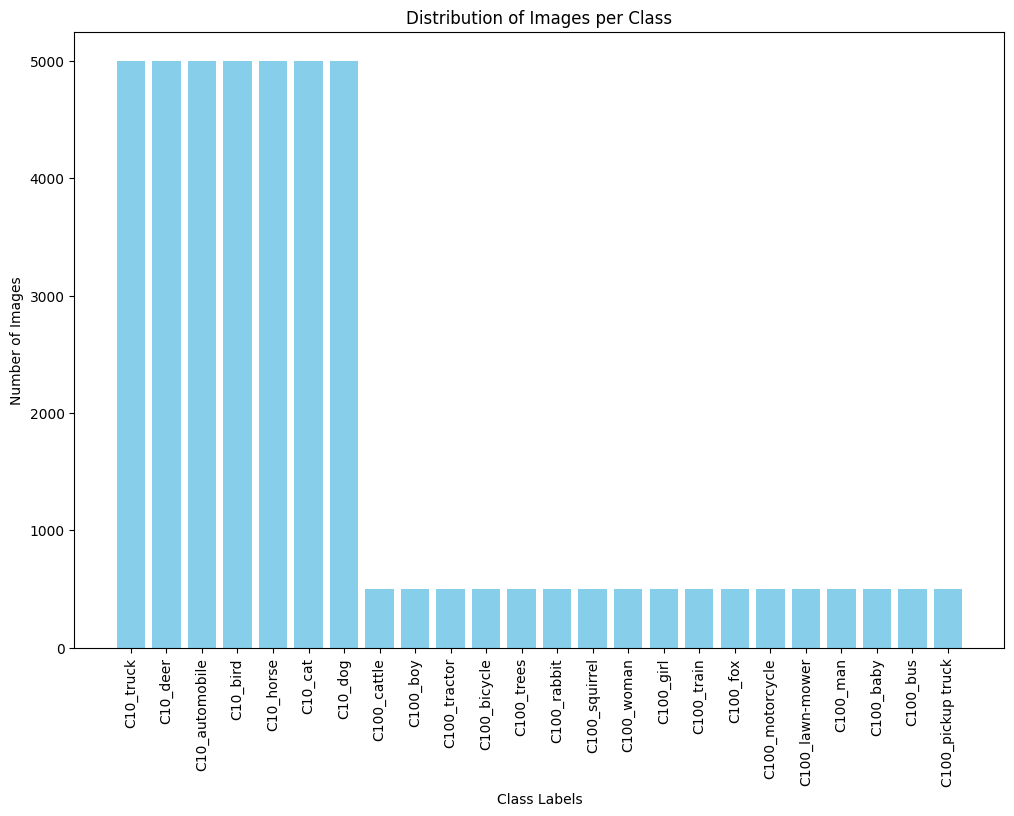

In [7]:
from collections import Counter
import matplotlib.pyplot as plt


label_counts = Counter(combined_labels)
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(12, 8))  # Set the figure size for better readability
plt.bar(labels, counts, color='skyblue')  # Create a bar graph with sky blue color
plt.xlabel('Class Labels')  # Set the x-axis label to 'Class Labels'
plt.ylabel('Number of Images')  # Set the y-axis label to 'Number of Images'
plt.title('Distribution of Images per Class')  # Set the title of the graph
plt.xticks(rotation=90)  # Rotate the class labels on x-axis for better visibility
plt.show()  # Display the plot


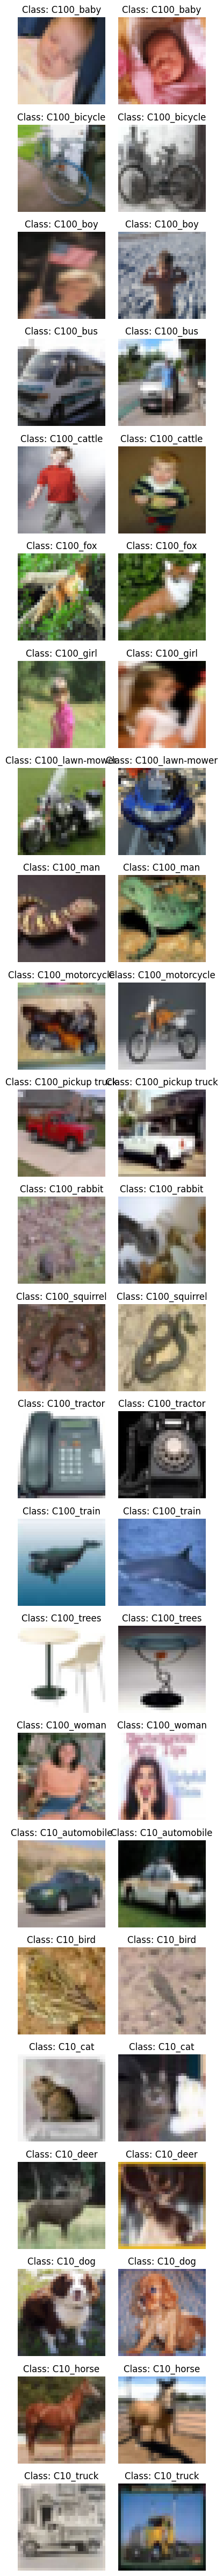

In [8]:
def display_sample_images(images, labels, num_samples=2):
    """
    Display sample images for each unique label.

    Parameters:
        images (list): List of images (assumed to be numpy arrays).
        labels (list): List of labels corresponding to the images.
        num_samples (int): Number of samples to display per class.
    """
    # Find unique labels
    unique_labels = np.unique(labels)
    # Set up the plot
    fig, ax = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*2, len(unique_labels)*2))
    
    for i, label in enumerate(unique_labels):
        # Get indices for the current label
        indices = [idx for idx, l in enumerate(labels) if l == label]
        # Shuffle indices to pick random images
        np.random.shuffle(indices)
        
        for j in range(num_samples):
            if len(indices) > j:  # Check if there are enough images
                img_idx = indices[j]
                img = images[img_idx]
                if img.ndim == 3 and img.shape[2] == 3:  # Check if images are colored
                    ax[i, j].imshow(img)
                else:
                    ax[i, j].imshow(img, cmap='gray')  # For grayscale images
                ax[i, j].axis('off')
                ax[i, j].set_title(f'Class: {label}')
            else:
                ax[i, j].axis('off')  # Turn off axis for empty subplots

    plt.tight_layout()
    plt.show()

# Example usage with combined_images and combined_labels
display_sample_images(combined_images, combined_labels, num_samples=2)

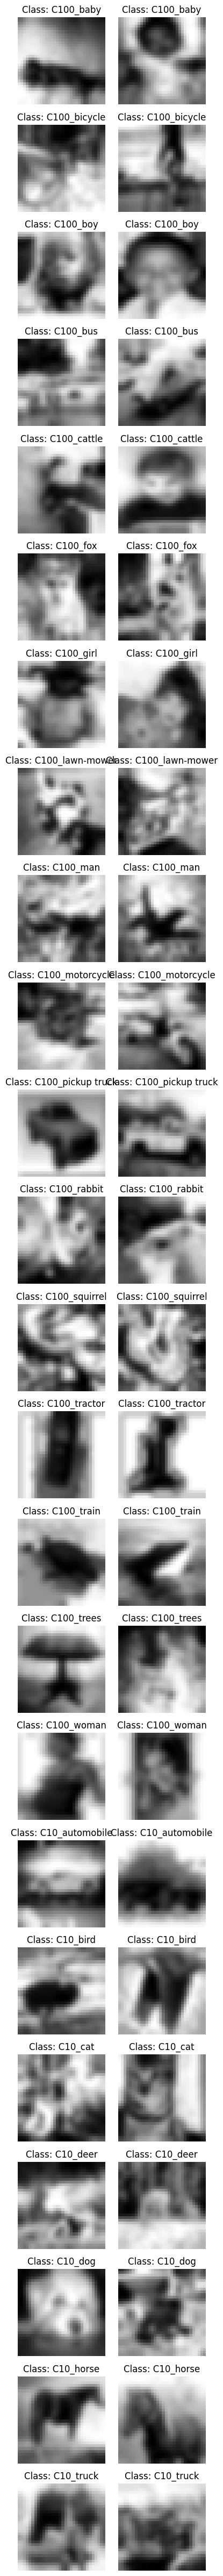

In [9]:
preprocessed_images = preprocess_images(combined_images)

#display images after preprocessing
display_sample_images(preprocessed_images, combined_labels, num_samples=2)

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Function to resize images
def resize_images(images, target_size=(64, 64)):
    resized_images = [array_to_img(img_to_array(img).resize(target_size)) for img in images]
    return resized_images


# Get the image size
image_size = combined_images[0].shape[:2]
print("Image size:", image_size)
# all images appear to be same size based on output so no need to resize images

unique_classes = np.unique(combined_labels)
print("Unique classes:", unique_classes)

Image size: (32, 32)
Unique classes: ['C100_baby' 'C100_bicycle' 'C100_boy' 'C100_bus' 'C100_cattle' 'C100_fox'
 'C100_girl' 'C100_lawn-mower' 'C100_man' 'C100_motorcycle'
 'C100_pickup truck' 'C100_rabbit' 'C100_squirrel' 'C100_tractor'
 'C100_train' 'C100_trees' 'C100_woman' 'C10_automobile' 'C10_bird'
 'C10_cat' 'C10_deer' 'C10_dog' 'C10_horse' 'C10_truck']


In [11]:
# Total number of images for training and testing sets and their labels
print("Total number of CIFAR-10 training images:", len(cifar10_train_images))
print("Total number of CIFAR-10 testing images:", len(cifar10_test_images))
print("Total number of CIFAR-100 training images:", len(cifar100_train_images))
print("Total number of CIFAR-100 testing images:", len(cifar100_test_images))

# Total number of images for each of the 24 classes
print("Number of images per class:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Comment on relative numbers of each type of image and how it can be handled
print("Relative numbers of each type of image:")
for label, count in label_counts.items():
    percentage = (count / total_images) * 100
    print(f"{label}: {percentage:.2f}% of the dataset")

Total number of CIFAR-10 training images: 50000
Total number of CIFAR-10 testing images: 10000
Total number of CIFAR-100 training images: 50000
Total number of CIFAR-100 testing images: 10000
Number of images per class:
C10_truck: 5000
C10_deer: 5000
C10_automobile: 5000
C10_bird: 5000
C10_horse: 5000
C10_cat: 5000
C10_dog: 5000
C100_cattle: 500
C100_boy: 500
C100_tractor: 500
C100_bicycle: 500
C100_trees: 500
C100_rabbit: 500
C100_squirrel: 500
C100_woman: 500
C100_girl: 500
C100_train: 500
C100_fox: 500
C100_motorcycle: 500
C100_lawn-mower: 500
C100_man: 500
C100_baby: 500
C100_bus: 500
C100_pickup truck: 500
Relative numbers of each type of image:
C10_truck: 11.49% of the dataset
C10_deer: 11.49% of the dataset
C10_automobile: 11.49% of the dataset
C10_bird: 11.49% of the dataset
C10_horse: 11.49% of the dataset
C10_cat: 11.49% of the dataset
C10_dog: 11.49% of the dataset
C100_cattle: 1.15% of the dataset
C100_boy: 1.15% of the dataset
C100_tractor: 1.15% of the dataset
C100_bicycl

In [19]:
from tensorflow.keras import layers, models, callbacks

def create_and_train_model(combined_train_images, combined_train_labels, epochs=15, batch_size=32):
    # Create a mapping of unique labels to integer indices
    label_mapping = {label: idx for idx, label in enumerate(set(combined_train_labels))}
    
    # Convert the combined_train_labels to an array of integer labels using the mapping
    combined_train_labels = np.array([label_mapping[label] for label in combined_train_labels])

    # Define a Sequential neural network model
    ann = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(len(label_mapping), activation='softmax')  # Output layer with softmax activation
    ])

    # Compile the model with appropriate optimizer, loss function, and metrics
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define an EarlyStopping callback to monitor the loss and stop early if it doesn't improve
    #Changing the patience to 3 from 5 makes it to very high accuracy but is too intensive without much effort to improve, it stops at 61% accuracy with EarlyStopping callback
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model on the combined_train_images and combined_train_labels
    ann.fit(combined_train_images, combined_train_labels, 
            epochs=epochs, 
            batch_size=batch_size, 
            callbacks=[early_stopping],
            validation_split=0.2)  # You can also specify a validation split here if needed

    # Return the trained model
    return ann


model = create_and_train_model(preprocessed_images, combined_labels)

# Save the trained model to a file
model.save('model2.h5')

Epoch 1/15


1088/1088 [==============================] - 21s 19ms/step - loss: 1.5480 - accuracy: 0.3872 - val_loss: 12.6374 - val_accuracy: 0.0100
Epoch 2/15
1088/1088 [==============================] - 19s 18ms/step - loss: 1.2893 - accuracy: 0.5068 - val_loss: 14.6410 - val_accuracy: 0.0128
Epoch 3/15
1088/1088 [==============================] - 19s 18ms/step - loss: 1.1449 - accuracy: 0.5690 - val_loss: 16.2505 - val_accuracy: 0.0141
Epoch 4/15
1088/1088 [==============================] - 19s 18ms/step - loss: 1.0344 - accuracy: 0.6116 - val_loss: 17.5456 - val_accuracy: 0.0141


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())  # Add batch normalization to improve training stability
model.add(MaxPooling2D((2, 2)))  # Add max pooling layer to reduce spatial dimensions

# Add the second convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Add the third convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

# Add the output layer with 24 units (one for each class) and softmax activation
model.add(Dense(24, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Save the model
model.save('model.h5')






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                     

c:\Users\hkhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras import layers, models, callbacks

def create_and_train_model(combined_train_images, combined_train_labels, epochs=15, batch_size=32):
    # Create a mapping of unique labels to integer indices
    label_mapping = {label: idx for idx, label in enumerate(set(combined_train_labels))}
    
    # Convert the combined_train_labels to an array of integer labels using the mapping
    combined_train_labels = np.array([label_mapping[label] for label in combined_train_labels])

    # Define a Sequential neural network model
    ann = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(len(label_mapping), activation='softmax')  # Output layer with softmax activation
    ])

    # Compile the model with appropriate optimizer, loss function, and metrics
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define an EarlyStopping callback to monitor the loss and stop early if it doesn't improve
    #Changing it to 9 to get higher accuracy 
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)
    
    # Train the model on the combined_train_images and combined_train_labels
    ann.fit(combined_train_images, combined_train_labels, 
            epochs=epochs, 
            batch_size=batch_size, 
            callbacks=[early_stopping],
            validation_split=0.2)  # You can also specify a validation split here if needed

    # Return the trained model
    return ann


model = create_and_train_model(preprocessed_images, combined_labels)

# Save the trained model to a file
model.save('model3.h5')

Epoch 1/15
1088/1088 [==============================] - 20s 17ms/step - loss: 1.5612 - accuracy: 0.3776 - val_loss: 11.1664 - val_accuracy: 0.0107
Epoch 2/15
1088/1088 [==============================] - 18s 17ms/step - loss: 1.2909 - accuracy: 0.5036 - val_loss: 13.9805 - val_accuracy: 0.0136
Epoch 3/15
1088/1088 [==============================] - 18s 17ms/step - loss: 1.1529 - accuracy: 0.5629 - val_loss: 15.2193 - val_accuracy: 0.0133
Epoch 4/15
1088/1088 [==============================] - 18s 17ms/step - loss: 1.0436 - accuracy: 0.6087 - val_loss: 17.2944 - val_accuracy: 0.0145
Epoch 5/15
1088/1088 [==============================] - 18s 17ms/step - loss: 0.9476 - accuracy: 0.6449 - val_loss: 18.0057 - val_accuracy: 0.0153
Epoch 6/15
1088/1088 [==============================] - 19s 17ms/step - loss: 0.8476 - accuracy: 0.6830 - val_loss: 19.8671 - val_accuracy: 0.0145
Epoch 7/15
1088/1088 [==============================] - 18s 17ms/step - loss: 0.7417 - accuracy: 0.7245 - val_loss: 19

In [24]:
from tensorflow.keras import layers, models, callbacks

def create_and_train_model(combined_train_images, combined_train_labels, epochs=20, batch_size=32):
    
    
    # Create a mapping of unique labels to integer indices
    label_mapping = {label: idx for idx, label in enumerate(set(combined_train_labels))}
    
    # Convert the combined_train_labels to an array of integer labels using the mapping
    combined_train_labels = np.array([label_mapping[label] for label in combined_train_labels])

    # Define a Sequential neural network model
    ann = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(len(label_mapping), activation='softmax')  # Output layer with softmax activation
    ])

    # Compile the model with appropriate optimizer, loss function, and metrics
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #removed early stopping callback to see improvemenet in accuracy
    
    
    # Train the model on the combined_train_images and combined_train_labels
    history = ann.fit(combined_train_images, combined_train_labels, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      validation_split=0.2)  # You can also specify a validation split here if needed



    return ann

model = create_and_train_model(preprocessed_images, combined_labels)

# Save the trained model to a file
model.save('model4.h5')

Epoch 1/20
1088/1088 [==============================] - 18s 16ms/step - loss: 1.5750 - accuracy: 0.3660 - val_loss: 12.6382 - val_accuracy: 0.0110
Epoch 2/20
1088/1088 [==============================] - 17s 16ms/step - loss: 1.2900 - accuracy: 0.5050 - val_loss: 15.3655 - val_accuracy: 0.0118
Epoch 3/20
1088/1088 [==============================] - 17s 16ms/step - loss: 1.1495 - accuracy: 0.5662 - val_loss: 16.1524 - val_accuracy: 0.0139
Epoch 4/20
1088/1088 [==============================] - 17s 16ms/step - loss: 1.0376 - accuracy: 0.6101 - val_loss: 17.2244 - val_accuracy: 0.0137
Epoch 5/20
1088/1088 [==============================] - 17s 16ms/step - loss: 0.9392 - accuracy: 0.6482 - val_loss: 20.4710 - val_accuracy: 0.0139
Epoch 6/20
1088/1088 [==============================] - 17s 16ms/step - loss: 0.8371 - accuracy: 0.6880 - val_loss: 19.5240 - val_accuracy: 0.0145
Epoch 7/20
1088/1088 [==============================] - 17s 16ms/step - loss: 0.7306 - accuracy: 0.7274 - val_loss: 21